In [1]:
#Préliminaire

In [2]:
divmod(10,5)


(2, 0)

In [3]:
divmod(15,5)

(3, 0)

In [4]:
divmod(50,3)

(16, 2)

In [5]:
divmod(2022,7)

(288, 6)

In [6]:
gcd(5,62) #premier entre eux

1

In [7]:
gcd(5,15) # le plus grand diviseur est 5

5

In [8]:
xgcd(5,17) #premier entre eux et 5*7 + -2 *17 = 1  avec les coefficients de Bézout

(1, 7, -2)

In [9]:
xgcd(2022,60)

(6, 3, -101)

In [10]:
is_prime(7)

True

In [11]:
is_prime(49993)

True

In [12]:
prime_range(10,50)

[11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [13]:
next_prime(7)

11

In [14]:
factor(40593)

3 * 7 * 1933

In [15]:
prime_pi(5)#2,3,5

3

In [16]:
prime_pi(11)#2,3,5,7,11

5

In [17]:
#Nombre Premier

In [18]:
#I 

In [19]:
prime_pi(10^11) #instantenement jusque 10^11
#prime_pi(10^12) #2 sec
#prime_pi(10^13) #20sec
#prime_pi(10^14) #plus qu'une minute

4118054813

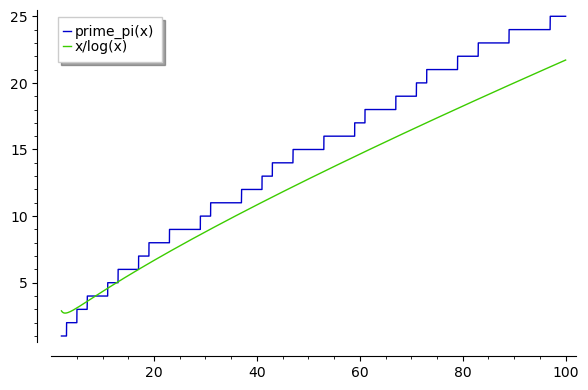

In [20]:
x=var('x')
plot([prime_pi(x), x/ln(x)] ,2,10^2, legend_label='automatic') 

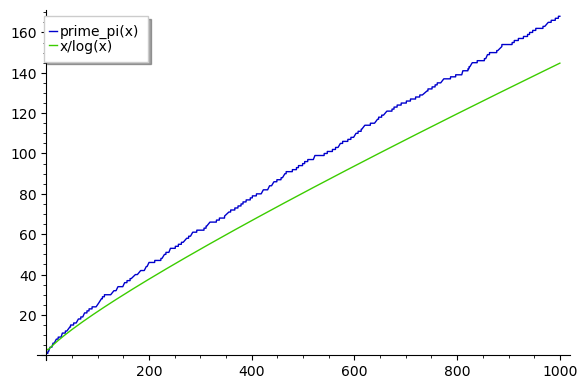

In [21]:
x=var('x')
plot([prime_pi(x), x/ln(x)] ,2,10^3, legend_label='automatic') 

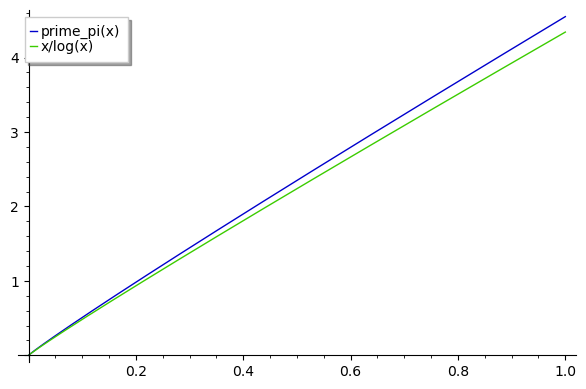

In [22]:
x=var('x')
plot([prime_pi(x), x/ln(x)] ,2,10^10, legend_label='automatic')


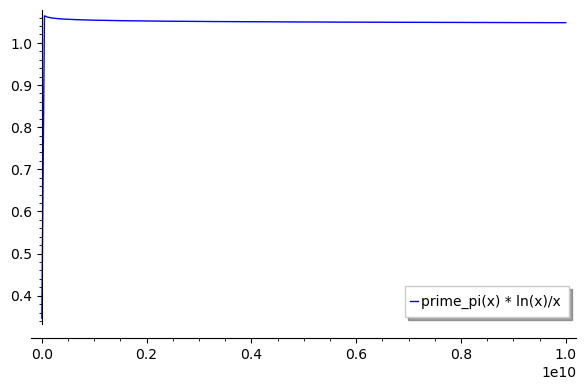

In [23]:
x=var('x')
plot(prime_pi(x) * ln(x)/x ,2,10^10, legend_label='prime_pi(x) * ln(x)/x')

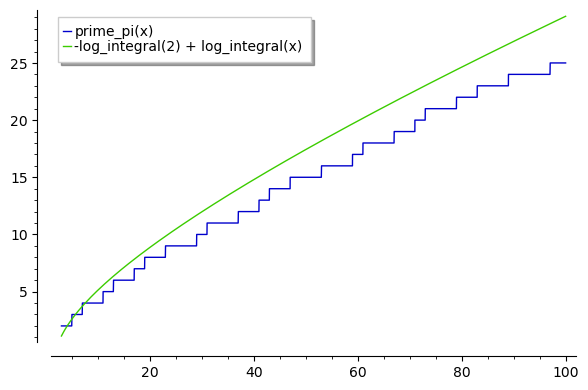

In [24]:
x=var('x')
plot([prime_pi(x), Li(x)] ,3,10^2, legend_label='automatic') # integrate(1/ln(t),t,2,x)

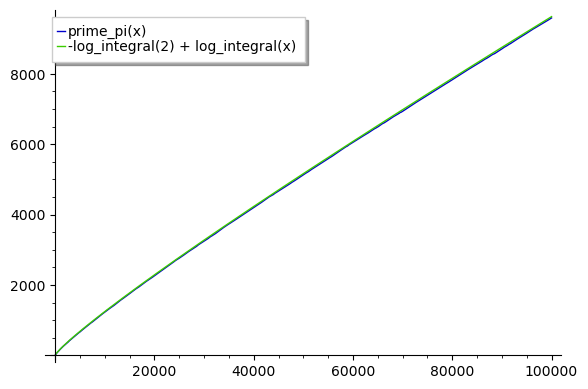

In [25]:
x=var('x')
plot([prime_pi(x), Li(x)] ,3,10^5, legend_label='automatic') # integrate(1/ln(t),t,2,x)

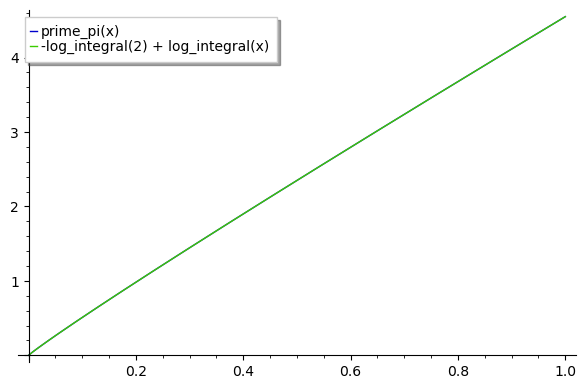

In [26]:
x=var('x')
plot([prime_pi(x), Li(x)] ,3,10^10, legend_label='automatic') # integrate(1/ln(t),t,2,x)

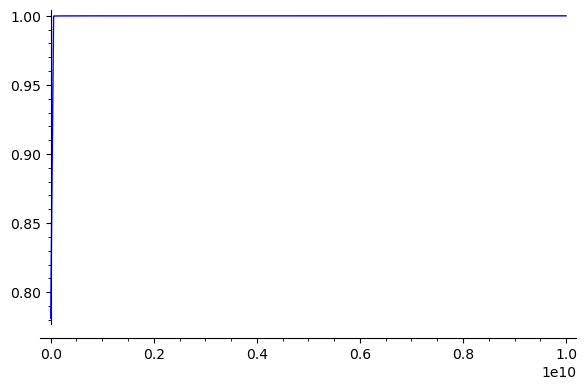

In [27]:
x=var('x')
plot(prime_pi(x)/Li(x) ,10,10^10)

In [28]:
a=N(prime_pi(10^10)/ Li(10^10))

In [29]:
b=N(prime_pi(10^10) * ln(10^10)/10^10)

In [30]:
(1-a)*100 # erreur avec Li

0.000681793909795836

In [31]:
(b-1)*100 # errur avec ln

4.77971283581089

In [32]:
b

1.04779712835811

In [33]:
#II

In [2]:
def Fermat_a_tord():
    n=0
    while(is_prime((2^(2^n))+1)):
        n=n+1
    return [2^(2^n),n]

In [3]:
Fermat_a_tord() # dur ...

[4294967296, 5]

In [36]:
#III

In [37]:
p_257=prime_range(257)

In [38]:
prime_pi(257)

55

In [41]:
def Calcul_Mersenne(n):
    return 2^n - 1

In [42]:
def Mersenne(nb1, nb2):
    liste=[]
    for p in prime_range(nb1, nb2+1):
        liste.append(Calcul_Mersenne(p))
    return liste

In [43]:
def Mersenne_premier(nb1, nb2):
    result=[]
    liste=[]
    for p in prime_range(nb1, nb2+1): #on utilise pas la fonction précédente pour avoir les p associé
        mers=Calcul_Mersenne(p)
        if(is_prime(mers)):
            result.append(p)
            liste.append(mers)
    return (result, liste)

In [44]:
(coef,liste_Mersenne)=Mersenne_premier(2,257)

In [43]:
coef

[2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127]

In [44]:
is_prime(Calcul_Mersenne(107)) # vérification 107

True

In [45]:
is_prime(Calcul_Mersenne(257)) # vérification 257

False

In [46]:
factor(Calcul_Mersenne(41))

13367 * 164511353

In [47]:
factor(Calcul_Mersenne(47))

2351 * 4513 * 13264529

In [48]:
def somme_diviseurs(n):
    sum=0
    for i in range(1,n):
        if(n//i==n/i):
            sum=sum+i
    return sum

In [49]:
somme_diviseurs(4)

3

In [50]:
somme_diviseurs(6)

6

In [51]:
def is_perfect(n):
    return somme_diviseurs(n)==n

In [52]:
is_perfect(4)

False

In [53]:
is_perfect(6)

True

In [54]:
def Mersenne_parfait(nb1,nb2):
    result=[]
    for i in Mersenne_premier(nb1,nb2+1)[0]: # pour avoir les coefficients
        mers=Calcul_Mersenne(i)
        if(not is_perfect(2^(i-1) *mers)):
            return False
    return True


In [55]:
Mersenne_parfait(2,10)

True

In [56]:
def Lucas(s):
    if(s%2==0):
        return False #pair !!
    n=Calcul_Mersenne(s)
    Ln=4
    for i in range(2,s):
        Ln=(Ln^2 - 2)%n
    
    if(Ln%n==0):
        return True
    
    else:
        return False

In [57]:
def comparaison():
    n=100000 # pour que la recompilation soit plus rapide
    dif=0
    while(dif<300 and n<300000): #1sec
        n=n+10001
        t1=time.time()
        Lucas(n)
        t2=time.time()
        dif=t2-t1
        print(dif) 
    print(n)    
    print(dif)  
    n=520 # pour que la recompilation soit plus rapide
    dif=0 
    while(dif<1 ):
        t1=time.time()
        is_prime(Calcul_Mersenne(n))
        t2=time.time()
        n=n+5
        dif=t2-t1
    print(n)

In [58]:
#comparaison()

In [59]:
import time
t1=time.time()
test=Lucas(132049)
t2=time.time()
print(t2-t1) 
print(test)

128.37678575515747
True


In [60]:
t1=time.time()
test=Lucas(216091)
t2=time.time()
print(t2-t1) #417.293541431427
print(test)

400.90607023239136
True


In [61]:
t1=time.time()
test=is_prime(Calcul_Mersenne(3217))
t2=time.time()
print(t2-t1)
print(test)


156.52274298667908
True


In [66]:
import time
def meilleur_Lucas():
    t0=time.time()
    t1=0
    n=11 # nombre premier pas trop petit
    t=0
    p=0
    while(t1<300):
        t=Lucas(n)
        t1=time.time()-t0
        if(t):
            p=n # garde en mémoire le plus grand nombre premier rencontrer  
        n=next_probable_prime(n) #pour ne pas inférer sur le temps
    return p

In [67]:
meilleur_Lucas()

11213

In [81]:
import time
def meilleur_is_prime():
    t0=time.time()
    t1=0
    n=11 # nombre premier pas trop petit
    t=0
    p=0
    while(t1<300):
        t=is_prime(Calcul_Mersenne(n))
        t1=time.time()-t0
        if(t):
            p=n # garde en mémoire le plus grand nombre premier rencontrer  
        n=next_probable_prime(n) #pour ne pas inférer sur le temps
    return p

In [82]:
meilleur_is_prime()

3217

In [70]:
#Exercice 3

In [71]:
def naif_it(x,n): #complexité de O(n)
    result=1
    for i in range(n):
        result*=x
    return result

In [72]:
def naif_rec(x,n): #complexité de O(n)
    if (n==1):
        return x
    else:
        return x*naif_rec(x,n-1)

In [73]:
naif_it(5,4)

625

In [74]:
naif_rec(5,4)

625

In [75]:
def dicho_rec(x,n,y):  # O(ln n)
    if(n==1):
        return x*y
    if(n%2==0):
        return dicho_rec(x*x,n/2,y)
    else:
        return dicho_rec(x*x,(n-1)/2,y*x)  

In [76]:
dicho_rec(5,10,1)

9765625

In [77]:
def dicho_it(x,n,y): # O(ln n)
    result=x
    y=1
    while(n>1):
        if(n%2==0):
            n=n/2
            result*=result
        else:
            n=(n-1)/2
            y*=result
            result*=result  
    return result*y

In [78]:
dicho_it(5,10,1)

9765625

In [2]:
def modpower(x,n,N):
    result=x
    y=1
    while(n>1):
        if(n%2==0):
            n=n/2
            result*=result % N
        else:
            n=(n-1)/2
            y*=result % N
            result*=result % N   
    return result*y % N

In [80]:
modpower(51,11,103)

43

In [81]:
power_mod(51,11,103)

43

In [82]:
51^11 % 103

43

In [10]:
modpower(456968,35230527,79123442)

25274758

In [9]:
456968^35230527 % 79123442 # bien plus long...

25274758

In [12]:
power_mod(456968,35230527,79123442) # même temps que notre fonction

25274758

In [83]:
#Exercice 4

In [8]:
S1=AlphabeticStrings();
print(S1)
S2=HexadecimalStrings();
print(S2)
S3=BinaryStrings();
print(S3)

Free alphabetic string monoid on A-Z
Free hexadecimal string monoid
Free binary string monoid


In [15]:
S1.encoding('Une vodka-Martini. Melangee au shaker, pas a la cuillere. - JB ') # min --> Maj et non prise en compte des espaces

UNEVODKAMARTINIMELANGEEAUSHAKERPASALACUILLEREJB

In [85]:
original="Que jaime à faire connaître un nombre utile aux sages ...";
ori_num=S3.encoding(original);
print(ori_num);
print(ori_num.decoding());

010100010111010101100101001000000110101001100001011010010110110101100101001000001110000000100000011001100110000101101001011100100110010100100000011000110110111101101110011011100110000111101110011101000111001001100101001000000111010101101110001000000110111001101111011011010110001001110010011001010010000001110101011101000110100101101100011001010010000001100001011101010111100000100000011100110110000101100111011001010111001100100000001011100010111000101110
Que jaime à faire connaître un nombre utile aux sages ...


In [86]:
ori_let=S2.encoding("Que jaime à faire connaître un nombre utile aux sages ...");
print(ori_let);
print(ori_let.decoding());


517565206a61696d6520e020666169726520636f6e6e61ee74726520756e206e6f6d627265207574696c6520617578207361676573202e2e2e
Que jaime à faire connaître un nombre utile aux sages ...


In [87]:
len(ori_num)

456

In [88]:
ori_num

010100010111010101100101001000000110101001100001011010010110110101100101001000001110000000100000011001100110000101101001011100100110010100100000011000110110111101101110011011100110000111101110011101000111001001100101001000000111010101101110001000000110111001101111011011010110001001110010011001010010000001110101011101000110100101101100011001010010000001100001011101010111100000100000011100110110000101100111011001010111001100100000001011100010111000101110

In [89]:
N(log(15)/log(2))   # N(.) pour avoir une approximation
                    # on voit donc qu'il faut int(log(N)/log(2))+1
int(log(15)/log(2))+1

4

In [90]:
def numerise(original,N):
    i=0
    ori_bin=S3.encoding(original);
    taille=len(ori_bin);
    paquet=int(log(N)/log(2))+1
    resultat=[]
    
    while(i<taille-paquet):
        mot_courant=int(str(ori_bin[0:paquet]),2)
        ori_bin=ori_bin[paquet:]
        resultat.append(mot_courant)
        i+=paquet
     
    ori_bin=str(ori_bin)
    taille=len(ori_bin)

    for j in range(paquet-taille):
        ori_bin = ori_bin + '0'
        
    resultat.append(int(ori_bin,2))
    return resultat

In [91]:
list_num=numerise(original,5)

In [92]:
list_num

[2,
 4,
 2,
 7,
 2,
 5,
 4,
 5,
 1,
 0,
 0,
 6,
 5,
 1,
 4,
 1,
 3,
 2,
 2,
 6,
 6,
 5,
 4,
 5,
 1,
 0,
 1,
 6,
 0,
 0,
 4,
 0,
 3,
 1,
 4,
 6,
 0,
 5,
 5,
 1,
 3,
 4,
 4,
 6,
 2,
 4,
 4,
 0,
 3,
 0,
 6,
 6,
 7,
 5,
 5,
 6,
 3,
 3,
 4,
 6,
 0,
 7,
 5,
 6,
 3,
 5,
 0,
 7,
 1,
 1,
 4,
 5,
 1,
 0,
 0,
 7,
 2,
 5,
 5,
 6,
 1,
 0,
 0,
 6,
 7,
 1,
 5,
 7,
 3,
 3,
 2,
 6,
 1,
 1,
 6,
 2,
 3,
 1,
 2,
 2,
 0,
 1,
 6,
 5,
 3,
 5,
 0,
 6,
 4,
 5,
 5,
 4,
 3,
 1,
 2,
 2,
 0,
 1,
 4,
 1,
 3,
 5,
 2,
 7,
 4,
 0,
 4,
 0,
 3,
 4,
 6,
 6,
 0,
 5,
 4,
 7,
 3,
 1,
 2,
 7,
 1,
 4,
 4,
 0,
 1,
 3,
 4,
 2,
 7,
 0,
 5,
 6]

In [93]:
def conversion_bin(n,N):
    if(N<0):
        print("erreur") #exception ?
    if (n > 1) or (N>1) :
        return( conversion_bin(n // 2,N-1) + str(n %2))
    else : 
        return(str(n %2))

In [94]:
conversion_bin(5,12)

'000000000101'

In [95]:
def alphabetise(list_num,N):
    i=0
    taille=len(list_num);
    resultat=""
    paquet=int(log(N)/log(2))+1
    while(i<taille):
        mot_courant=conversion_bin(list_num[0],paquet)
        list_num=list_num[1:]
        resultat+=mot_courant
        i+=1
        
    mot=S3(resultat);
    
    return mot.decoding()

In [96]:
mot=alphabetise(list_num,5)

In [97]:
mot

'Que jaime à faire connaître un nombre utile aux sages ...'

In [98]:
#ore=int(num)
#print(ore.decoding())

In [99]:
conversion_bin(2,3)

'010'

In [100]:
#4.3

In [101]:
factor(12345678998776543212325263575737675253568746862374340956273856298475750347523789572389)
factor(123456789987765432123252635675737675253568746862374340956273856298475750347523789572389) # a partir de là ça prend du temps

3^2 * 463 * 1063 * 3642819352103 * 675108693939607 * 2920323560274736829 * 3880752157376432275978641677254201

In [102]:
len('123456789987765432123252635675737675253568746862374340956273856298475750347523789572389')

87

In [17]:
import random

def cleRSA(r):
    
    m=10^r
    rand=random.randrange(10^(int(r/10)),10^(int(r/2)))
    p=next_probable_prime(rand)
    
    
    rand=random.randrange(int(m/p),int((m*10)/p))
    q=next_probable_prime(rand)
    

    
    n=p*q
    phi=(p-1)*(q-1)
    
    rand=random.randrange(n,n*2)
    
    while(gcd(rand,phi)!=1):
        rand=rand+1
    e=rand
    
    
    bezout= xgcd(e,phi)
    d=bezout[1] % phi
    
    
    return [n,e,d]

In [110]:
cleRSA(4)

[64789, 123335, 58139]

In [111]:
factor(64789)

67 * 967

In [112]:
M=1234
C=M^123335 % 64789
print(C)

5401


In [113]:
D=C^58139 % 64789 # On retrouve bien le même résultat
print(D)

1234


In [18]:
cleRSA(30)

[2836111689337907248379405457491,
 5376176127226666214960532617365,
 1755407665423482108760882948285]

In [21]:
factor(2836111689337907248379405457491)

977517349759597 * 2901341536327103

In [22]:
cleRSA(30)

[6825458987009010606068449340501,
 7877740732373548411212507657209,
 5200986377225505909296876252489]

In [23]:
factor(6825458987009010606068449340501)

373864108451861 * 18256523781522241

In [114]:
cleRSA(2048)

[975871519830052837267716775101376558673759744037641870111313332999420236611801475404731632423162565032438517232368547391593069587441765706089315348157563636825282050740979754283941081838436369636781229144653079316877691033824131886043556387585499191348000462817900465850485265303654640409487839395868759178927335810816182107663297910680660433595579877594022657113650334844775202904564268939993740844217748170905238246842477696376640501091311969046404443482331054504271058312676098378997201706308420836635019607819816269392809839264773718436575621949721105048755641880474291061568347472152927907638048886258663294075689953598592551328409687166736987930124739271752657304078249355974156074957407405782823283904622748859669028946463122700841179510456691564974720656237862147154490463269756058096797626821303379439690791860529843339867510237974973883935996193293658876750925697200029977798036990332775702562171653163441918110113738682399786232964838515225577745055829679810981959472232319311076207505244

In [115]:
cleRSA(3048)

[577380099405646224426914760749960186041203543744585937798522099423284653703396734049032160622029976199915848784875676205808757368144432049433000667013711573823590207649581553148658792751728743955838976843426237319883228615417728966925336180274383322804815529759155632640805911811968391513380821348466353835619757893112220113562627771868492408401130130778082958391358726594900097027534424341400340087368155455071244795576667085205978100066050779789028622123314102613164419457616297515998561044663165441891080887434501724654269996009012356724401065048540953739262707023932253146957906383534274267260432925785053081232865569521432781394053853581573863570990070376689482860036820294557157018155978230017489759692416533434727255630392480198410041163665525236630657025569787418276575058989984813143664513184545794838219579094910518931832333235519968341592898882634961076203312863803414741364936451041802675536660896541031819813735391199423847638905625581687172014794927278926489437235885373270101695505716

In [116]:
#4.4

In [117]:
def crypt(liste_ori,e,n):
     return list(map(lambda x: power_mod(x,e,n), liste_ori))

def decrypt(liste_ori,d,n):
     return list(map(lambda x: power_mod(x,d,n), liste_ori))
    

In [118]:
#4.5

In [119]:
[NA,eA,dA]=cleRSA(30)
[NB,eB,dB]=cleRSA(30)

paquet=int(len(bin(NA)))

In [120]:
def protocole1():

    # chez Alice
    
    
    m1="Bonjour Bob !"
    s1="Aliceee"
    m1c=numerise(m1,paquet)
    s1c=numerise(s1,paquet)
    m2c=crypt(m1c,eB,NB)
    s2c=crypt(s1c,dA,NA)
    
    print("messsage envoyé à Bob : ", m2c,s2c)
    
     # chez Bob
    
    mb = decrypt(m2c,dB,NB)
    sb = decrypt(s2c,eA,NA)
    
    m=alphabetise(mb,paquet)
    s=alphabetise(sb,paquet)
    
    print("messsage decrypté : ",m)
    print("signature decryptée : ",s)
    
    return

print("Alice : ", NA,eA,dA)
print("Bob :   ",NB,eB,dB)
protocole1()

Alice :  8201400089888225532225745914767 14052835031184915240431073973109 7818322720981017822573888169373
Bob :    2555598477676211358108072672133 3745359237830521758132315971091 487379903129228699936656232571
messsage envoyé à Bob :  [1392182019991598173382143099697, 1090105715831844959735660116769, 1108316178536463022015139270394, 2104883157711993895914395045061, 1149976701021207318135757289533, 1021370868644668596978085858803, 266550445766676037976064169781, 1895419426601949380670930348647, 37229223831492422437111334038, 37229223831492422437111334038, 1667516341142590426939672874503, 1983608480562766246051292389903, 1122989102727588797281512473115, 0, 1421167206225548482773552522837] [399118568267896155237534384761, 3248480698665327323008085234432, 5021167188032354666906079649296, 6176483591977539287676292990973, 2895277330217776617884377209924, 7994125925623129089800031728088, 3537666890855854716755097302116, 1665784236280489450278402727021]
messsage decrypté :  Bonjour Bob !
signa

In [121]:
def protocole2():
    
    # chez Alice
    m1="Bonjour Bob !"
    if(NA>NB):

        m1c=numerise(m1,paquet)
        m2c=crypt(m1c,eB,NB)
        m3c=crypt(m2c,dA,NA)
        
        print("messsage envoyé à Bob : ", m3c)

         # chez Bob
        
        md = decrypt(m3c,eA,NA)
        m1d = decrypt(md,dB,NB)
        m2d=alphabetise(m1d,paquet)

        print("messsage decrypté : ",m2d)
    
    if(NB>=NA):
        m1c=numerise(m1,paquet)
        m2c=crypt(m1c,dA,NA)
        m3c=crypt(m2c,eB,NB)
        
        print("messsage envoyé à Bob : ", m3c)

         # chez Bob
        md = decrypt(m3c,dB,NB)
        m1d = decrypt(md,eA,NA)
        m2d=alphabetise(m1d,paquet)

        print("messsage decrypté : ",m2d)
    return
protocole2()

messsage envoyé à Bob :  [4481052478894178652473196059190, 2424453629107211733400911162818, 5885475804968181447163699240175, 3265182658234180931507458964778, 2401179867878547330190091612457, 1904789461102488459092861750280, 6386176819118319838973880460794, 5505947453252132541787223976842, 2833941281128272808628743596217, 2833941281128272808628743596217, 2298987311755980531573273138463, 6091066635833234695630107419504, 5525226292654555447292906317718, 0, 4219135788432177586648096741474]
messsage decrypté :  Bonjour Bob !


In [122]:
#5

In [123]:
def method_de_Fermat(N):
    l=1
    k=0
    r=int(sqrt(l*N))+1 #partie entière supérieur
    n=l+k
    R=r+k
    S=sqrt(R^2-l*N)
    
    while int(S) != S :
        for L in range(l,n+1):
            k=n-L
            r=int(sqrt(L*N))+1
            R=r+k
            S=sqrt(R^2-L*N)
        n=n+1
        l=L
    return (L-1,gcd(N,R-S),gcd(N,R+S))

In [124]:
method_de_Fermat(2027651281)

(1847, 46061, 44021)

In [125]:
44021*4661

205181881

In [126]:
factor(100895598169)

112303 * 898423

In [127]:
method_de_Fermat(101544627113)

(5804, 112901, 899413)

In [128]:
112901*899413

101544627113

In [129]:
def somme(list1,list2):
    if( len(list1) != len(list2)):
        exit("erreur !!!")
    result=[1]*len(list1)
    for i in range(len(list1)) :
        result[i]=list2[i]+list1[i]
    return result

In [130]:
def negatif_fois(liste,a):
    result=[1]*len(liste)
    for i in range(len(liste)):
        result[i]=-a*liste[i]
    return result

In [131]:
def trier(a,b):
    if a<b:
        return (b,a)
    else:
        return (a,b)

In [132]:
def Taille(p,q): #on veut Taille=max(l,k,|m|)
    #p,q)=trier(p,q)
    if p<q:
        c=q
        q=p
        p=c
    lp=[1,0,p]
    Taille=max(abs(lp[0]),abs(lp[1]),abs(lp[2]))
    lq=[0,1,q]
    t=max(abs(lq[0]),abs(lq[1]),abs(lq[2]))
    
    while(t<Taille):
        
        Q=lp[2]//q
        lr=somme(lp,negatif_fois(lq,Q))
        lp=lq
        
        lq=lr
        q=lq[2]
        Taille=max(abs(lp[0]),abs(lp[1]),abs(lp[2]))
        t=max(abs(lq[0]),abs(lq[1]),abs(lq[2]))
        
    return Taille

In [133]:
Taille(112901,899413)

948

In [134]:
Taille(112303,898423)

8

In [135]:
#6

In [136]:
import random
def primaliter_Fermat(n):
    result=" le nombre n est probablement premier"
    for i in range(int((n-1)/2)):
        a=random.randrange(2,n)
        if(gcd(a,n)!=1 or power_mod(a,n-1,n)!=1):
            result="n est composé"
            break
    return result

In [137]:
primaliter_Fermat(13)

' le nombre n est probablement premier'

In [138]:
primaliter_Fermat(46061)

' le nombre n est probablement premier'

In [139]:
primaliter_Fermat(1729)

'n est composé'

In [140]:
def test_Fermat(n,a):
    result=True
    if(gcd(a,n)!=1 or power_mod(a,n-1,n)!=1):
        result=False
    return result

In [141]:
test_Fermat(1729,3)

True

In [142]:
def defi_Fermat(): 
    for c in range(6,10000):
        ci=False
        if (not is_prime(c)):
                for i in range(2,6):
                    if(test_Fermat(c,i)):
                        ci=True
                    else:
                        ci=False
                        break
                if(ci):
                    return c

In [143]:
defi_Fermat() #qui est le nombre de Ramanujan

1729

In [144]:
factor(561) #lui ne passe pas le test malgré qu'il soit le plus petit nombre de Carmichaël car gcd(3,561) renvoie faux

3 * 11 * 17

In [145]:
def nombre_div_deux(p):
    b=0
    pm=p-1
    while(pm%2 ==0):
        pm=pm//2
        b+=1
    return (b,pm)

In [146]:
nombre_div_deux(13)

(2, 3)

In [147]:
def test_Miller_Rabin(p,a):
    (b,pm)=nombre_div_deux(p)
    m=int((p-1)/2^b)
    z=power_mod(a,m,p)
    
    if(z==1 or z==p-1):
        return True
       
    for i in range(1,b):
        z=power_mod(z,2,p)
        if(z==p-1):
            return True
        if(z==1):
            return False
    return False
    return p

In [148]:
def defi_Miller_Rabin():
    for c in range(25300000,26000000):
        ci=False
        if (not is_prime(c)):
                for i in range(2,6):
                    if(test_Miller_Rabin(c,i)):
                        ci=True
                    else:
                        ci=False
                        break
                if(ci):
                    return c

In [149]:
defi_Miller_Rabin()

25326001

In [150]:
test_Miller_Rabin(25326001,5)

True

In [24]:
factor(25326001)

2251 * 11251